Potential Hazard Asteroid Dataset TEAM 20

Importing the required libraries and the csv file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
import os
from sklearn.model_selection import GridSearchCV
!pip install pydotplus
!pip install graphviz
%matplotlib inline
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import mean_squared_error

data = pd.read_csv(r"C:\Users\sneha\OneDrive\Documents\Downloads\archive\dataset.csv",low_memory=False)

Displaying part of the data

In [2]:
pd.set_option('display.max_columns', 100)
data.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433028,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


Printing the columns of the dataset

In [3]:
columnnames=data.columns
print(columnnames)

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')


Describing the Dataset

In [4]:
data.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958523.000000,958520.000000,9.585240e+05,9.585240e+05,9.585240e+05,9.585200e+05,9.585230e+05,9.386030e+05,958397.000000,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,2.394887,9.054901,168.456416,181.369457,177.352582,3.455820,2.366846e-01,2.458856e+06,2.019581e+07,5.085344e+03,1.392287e+01,1.415162e+00,539.364207,7.262721e-01,1.541424e+01,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,2.139246,6.637656,102.881707,103.887995,105.816844,71.769401,7.941705e-02,1.580506e+03,4.337669e+04,2.308961e+06,6.321581e+03,2.156731e+00,834.306975,9.336391e+01,4.392381e+03,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,0.070511,0.007744,0.000025,0.000130,-70.703676,0.653773,1.608247e-07,2.283183e+06,1.539011e+07,1.511918e+02,0.000000e+00,4.544120e-07,0.000000,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,1.971401,4.165419,80.604399,91.482063,83.785012,2.781603,1.894969e-01,2.458560e+06,2.019032e+07,1.347738e+03,3.689903e+00,9.797020e-01,375.394939,5.474900e-08,2.046500e-08,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,2.225816,7.415665,159.826919,182.358081,175.641078,3.046995,2.288655e-01,2.458945e+06,2.020041e+07,1.572976e+03,4.306571e+00,1.240850e+00,477.706175,8.171600e-08,3.849150e-08,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,2.578315,12.407550,252.247751,271.521589,269.865749,3.364793,2.671142e-01,2.459361e+06,2.021053e+07,1.899765e+03,5.201272e+00,1.593370e+00,617.324804,2.336475e-07,1.044675e-07,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,80.398819,175.082901,359.999793,359.999646,491.618014,66972.796064,2.381082e+00,2.546362e+06,2.259081e+07,2.238462e+09,6.128574e+06,7.947660e+01,30929.908422,3.942500e+04,3.241200e+06,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


Printing the shape of the dataset

In [5]:
data.shape

(958524, 45)

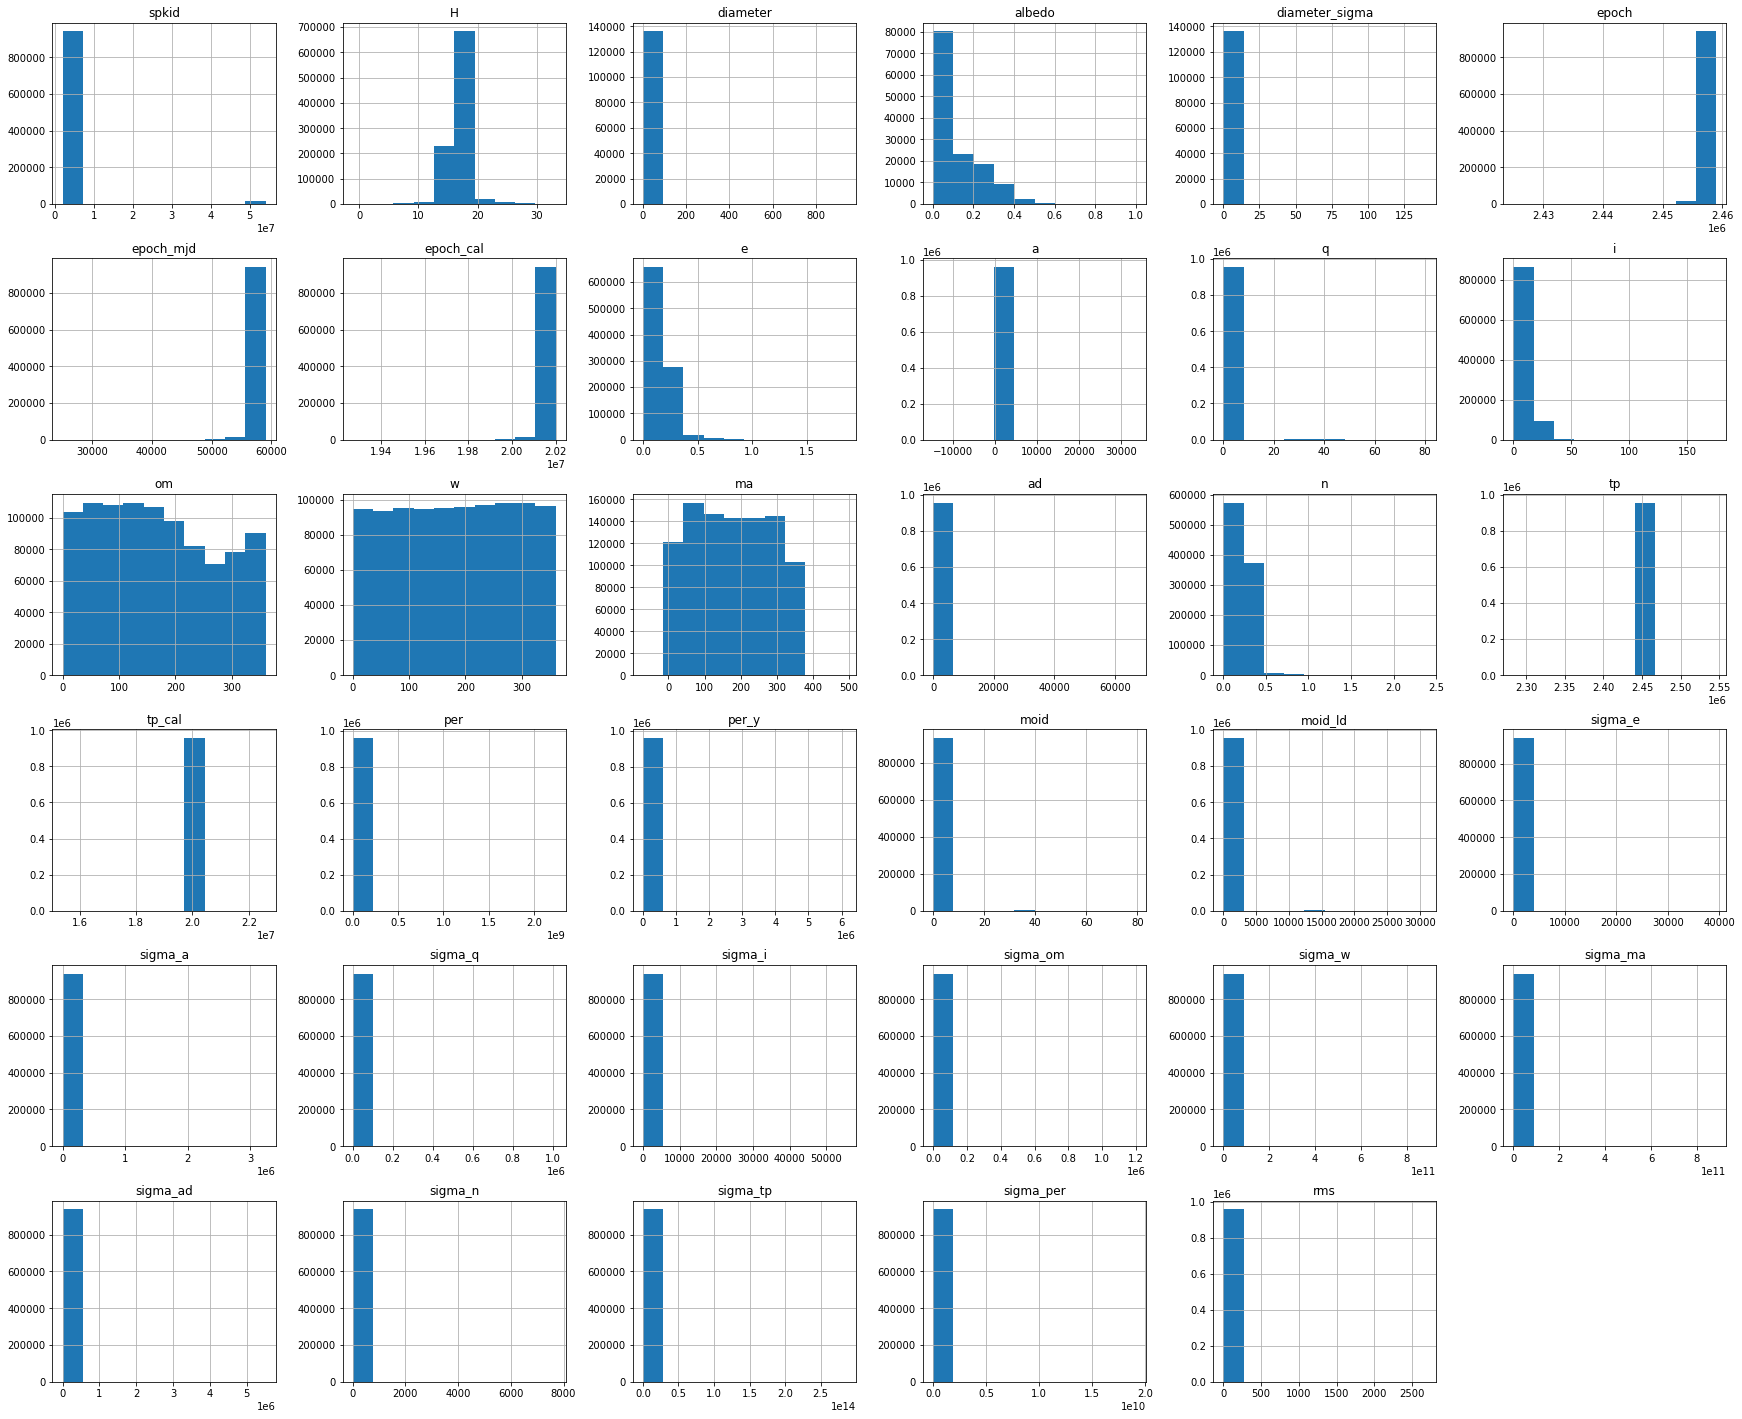

In [6]:
data.hist(figsize=(30,25))
plt.show()

Checking to see if there are unique names for the asteroids

In [7]:
print(data['id'].nunique())
print(data['spkid'].nunique())
print(data['full_name'].nunique())
print(data['pdes'].nunique())

958524
958524
958524
958524


Printing the count of potential hazard asteroid

N    0.997799
Y    0.002201
Name: pha, dtype: float64


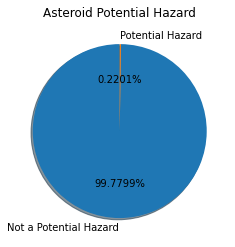

In [8]:
print(data['pha'].value_counts(normalize=True))
name = ['Not a Potential Hazard', 'Potential Hazard']
plt.title("Asteroid Potential Hazard")
plt.pie(data['pha'].value_counts(), labels=name, autopct='%0.4f%%', shadow=True, startangle=90)
plt.show()

Printing the count of near earth objects

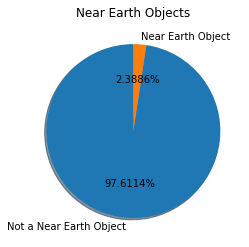

In [9]:
neocount=data['neo'].value_counts(normalize=True)
name = ['Not a Near Earth Object', 'Near Earth Object']
plt.title("Near Earth Objects")
plt.pie(neocount, labels=name, autopct='%0.4f%%', shadow=True, startangle=90)
plt.show()

Deciding to drop the following columns as they contain just one value

In [10]:
print(data['prefix'].unique())
print(data['prefix'].nunique())
print(data['equinox'].unique())
print(data['equinox'].nunique())

[nan 'A']
1
['J2000']
1


Deleting the following columns as they are redundant

In [11]:
cleandata = data.drop(['id', 'pdes', 'name', 'prefix', 'equinox'], axis='columns', inplace=False)

Cleaning the dataset and handling the missing values by adding the mean value

In [12]:
cleandata["diameter"] = cleandata["diameter"].replace(np.NaN, cleandata["diameter"].mean())

In [13]:
cleandata["albedo"] = cleandata["albedo"].replace(np.NaN, cleandata["albedo"].mean())

In [14]:
cleandata["diameter_sigma"] = cleandata["diameter_sigma"].replace(np.NaN, cleandata["diameter_sigma"].mean())

In [15]:
cleandata["H"] = cleandata["H"].replace(np.NaN, cleandata["H"].mean())

Checking to see if all the columns have any remaining missing values

In [16]:
cleandata.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,958524.000000,958524.000000,958524.000000,958524.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958523.000000,958520.000000,9.585240e+05,9.585240e+05,9.585240e+05,9.585200e+05,9.585230e+05,9.386030e+05,958397.000000,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,2.394887,9.054901,168.456416,181.369457,177.352582,3.455820,2.366846e-01,2.458856e+06,2.019581e+07,5.085344e+03,1.392287e+01,1.415162e+00,539.364207,7.262721e-01,1.541424e+01,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.784546,3.552949,0.041419,0.294985,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,2.139246,6.637656,102.881707,103.887995,105.816844,71.769401,7.941705e-02,1.580506e+03,4.337669e+04,2.308961e+06,6.321581e+03,2.156731e+00,834.306975,9.336391e+01,4.392381e+03,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,0.070511,0.007744,0.000025,0.000130,-70.703676,0.653773,1.608247e-07,2.283183e+06,1.539011e+07,1.511918e+02,0.000000e+00,4.544120e-07,0.000000,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,5.506429,0.130627,0.479184,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,1.971401,4.165419,80.604399,91.482063,83.785012,2.781603,1.894969e-01,2.458560e+06,2.019032e+07,1.347738e+03,3.689903e+00,9.797020e-01,375.394939,5.474900e-08,2.046500e-08,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,5.506429,0.130627,0.479184,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,2.225816,7.415665,159.826919,182.358081,175.641078,3.046995,2.288655e-01,2.458945e+06,2.020041e+07,1.572976e+03,4.306571e+00,1.240850e+00,477.706175,8.171600e-08,3.849150e-08,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.700000,5.506429,0.130627,0.479184,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,2.578315,12.407550,252.247751,271.521589,269.865749,3.364793,2.671142e-01,2.459361e+06,2.021053e+07,1.899765e+03,5.201272e+00,1.593370e+00,617.324804,2.336475e-07,1.044675e-07,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,80.398819,175.082901,359.999793,359.999646,491.618014,66972.796064,2.381082e+00,2.546362e+06,2.259081e+07,2.238462e+09,6.128574e+06,7.947660e+01,30929.908422,3.942500e+04,3.241200e+06,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


Removing the missing rows in the following two columns

In [17]:
cleandata = cleandata[cleandata['sigma_ad'].notna()]
cleandata = cleandata[cleandata['ma'].notna()]

Checking the shape of the dataset

In [18]:
cleandata.shape

(938597, 40)

Checking for the remaining rows after cleaning

In [19]:
cleandata.columns

Index(['spkid', 'full_name', 'neo', 'pha', 'H', 'diameter', 'albedo',
       'diameter_sigma', 'orbit_id', 'epoch', 'epoch_mjd', 'epoch_cal', 'e',
       'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per',
       'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i',
       'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp',
       'sigma_per', 'class', 'rms'],
      dtype='object')

Since the following columns do not having numerical values converting them to category type

In [20]:
dataframe_asteroid=cleandata
dataframe_asteroid['neo'] = dataframe_asteroid['neo'].astype('category')
dataframe_asteroid['pha'] = dataframe_asteroid['pha'].astype('category')
dataframe_asteroid['class'] = dataframe_asteroid['class'].astype('category')
dataframe_asteroid['orbit_id'] = dataframe_asteroid['orbit_id'].astype('category')

Checking for the count of neo and pha once again after cleaning

In [21]:
dataframe_asteroid['neo'].value_counts(normalize=True)*100

N    97.560827
Y     2.439173
Name: neo, dtype: float64

In [22]:
dataframe_asteroid[dataframe_asteroid['neo']=='Y']['pha'].value_counts(normalize=True)*100
#All near earth asteroids are not potentially hazardous

N    90.975802
Y     9.024198
Name: pha, dtype: float64

In [23]:
dataframe_asteroid['pha'].value_counts(normalize=True)*100

N    99.779884
Y     0.220116
Name: pha, dtype: float64

In [24]:
dataframe_asteroid[dataframe_asteroid['pha']=='Y']['neo'].value_counts(normalize=True)*100
#All PHA asteroids are near earth

Y    100.0
N      0.0
Name: neo, dtype: float64

Checking for the counts of classes and orbit_ids

In [25]:
dataframe_asteroid['class'].value_counts(normalize=True)*100

MBA    89.221466
OMB     2.963466
IMB     2.120505
MCA     1.955685
APO     1.351698
AMO     0.900919
TJN     0.869383
TNO     0.368635
ATE     0.184211
CEN     0.053697
AST     0.007991
IEO     0.002344
Name: class, dtype: float64

In [26]:
counts = dataframe_asteroid.groupby('class')['pha'].count().reset_index()
counts

,class,pha
0,AMO,8456
1,APO,12687
2,AST,75
3,ATE,1729
4,CEN,504
5,IEO,22
6,IMB,19903
7,MBA,837430
8,MCA,18356
9,OMB,27815


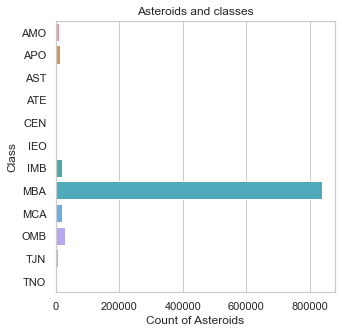

<Figure size 432x288 with 0 Axes>

In [27]:
counts = counts.sort_values(by = "pha",ascending=True)
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(5,5))
xlabel="asteroid count"
sns.barplot(y="class", x="pha", data=counts)
ax.set(ylabel='Class', xlabel='Count of Asteroids')
plt.title("Asteroids and classes")
plt.show()
plt.savefig("class.png")

In [28]:
dataframe_asteroid['orbit_id'].nunique()

525

In [29]:
dataframe_asteroid = dataframe_asteroid.reset_index(drop=True)

Before performing Minmax scaling taking a subset of the dataset that contains just the numerical values and keeping aside the rest

In [30]:
dataframe_subset = dataframe_asteroid[dataframe_asteroid.columns[~dataframe_asteroid.columns.isin(['spkid', 'full_name','neo', 'pha', 'orbit_id', 'class'])]]

In [31]:
dataframe_asteroid.head()

,spkid,full_name,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,2000001,1 Ceres,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,2000002,2 Pallas,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,2000003,3 Juno,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,2000004,4 Vesta,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,2000005,5 Astraea,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433028,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


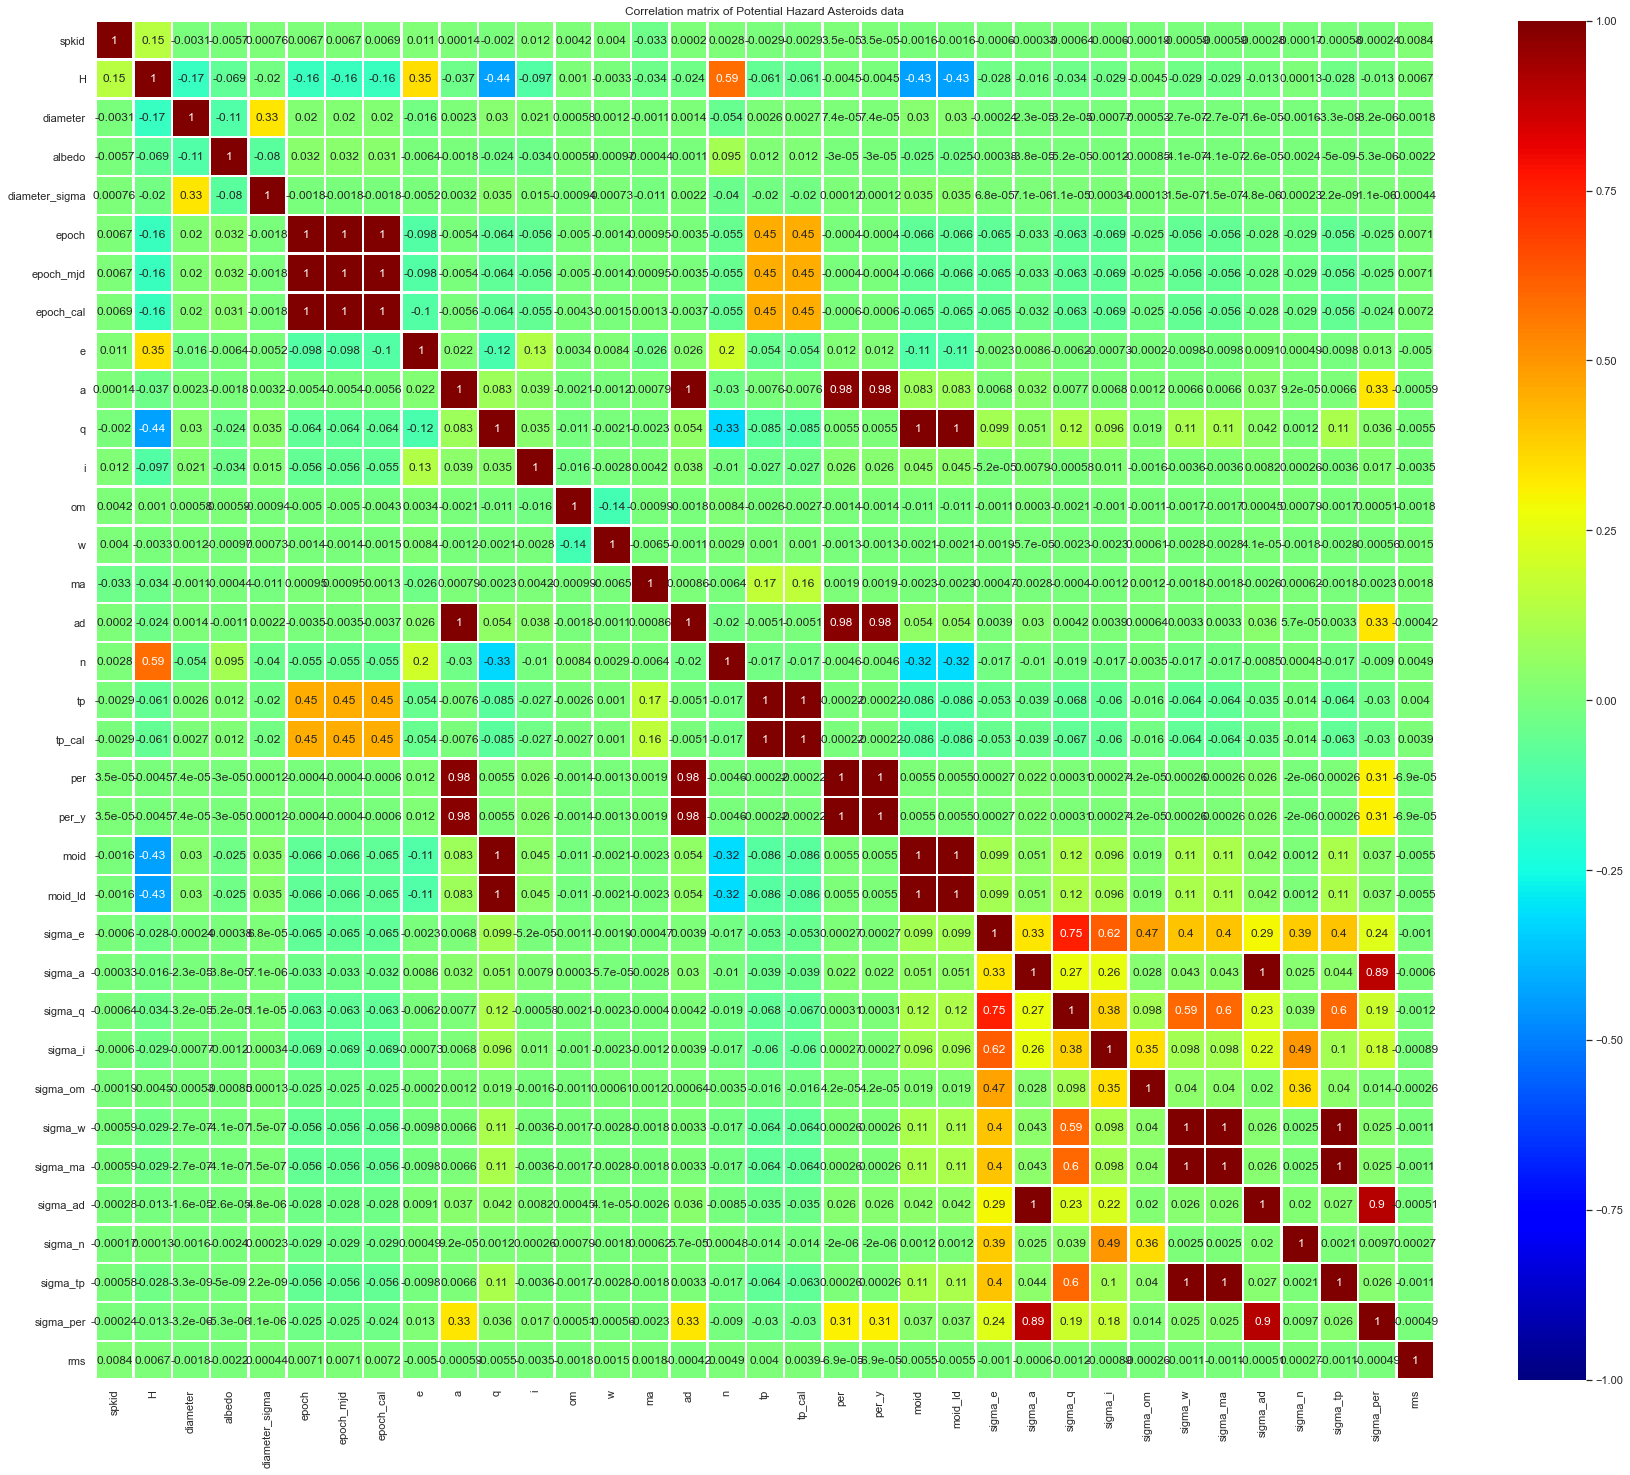

In [32]:
correlation_matrix=dataframe_asteroid.corr()
plt.figure(figsize=(30,25))
plt.title("Correlation matrix of Potential Hazard Asteroids data")
sns.heatmap(data=correlation_matrix,cmap='jet',vmin=-1,vmax=1,linewidth=1.5,annot=True)
fig1 = plt.gcf()
plt.show()
fig1.savefig("correlationmatrix.png")

After looking at the correlation matrix, we are removing epoch_mjd and epoch_cal since they are highly corrrelated to epoch and sigma_w, sigma_a and a are highly correlated as well

In [33]:
dataframe_subset = dataframe_subset.drop(['epoch_mjd', 'epoch_cal','sigma_w','sigma_a','a'], axis='columns', inplace=False)

After removing the highly correlated redundant features.

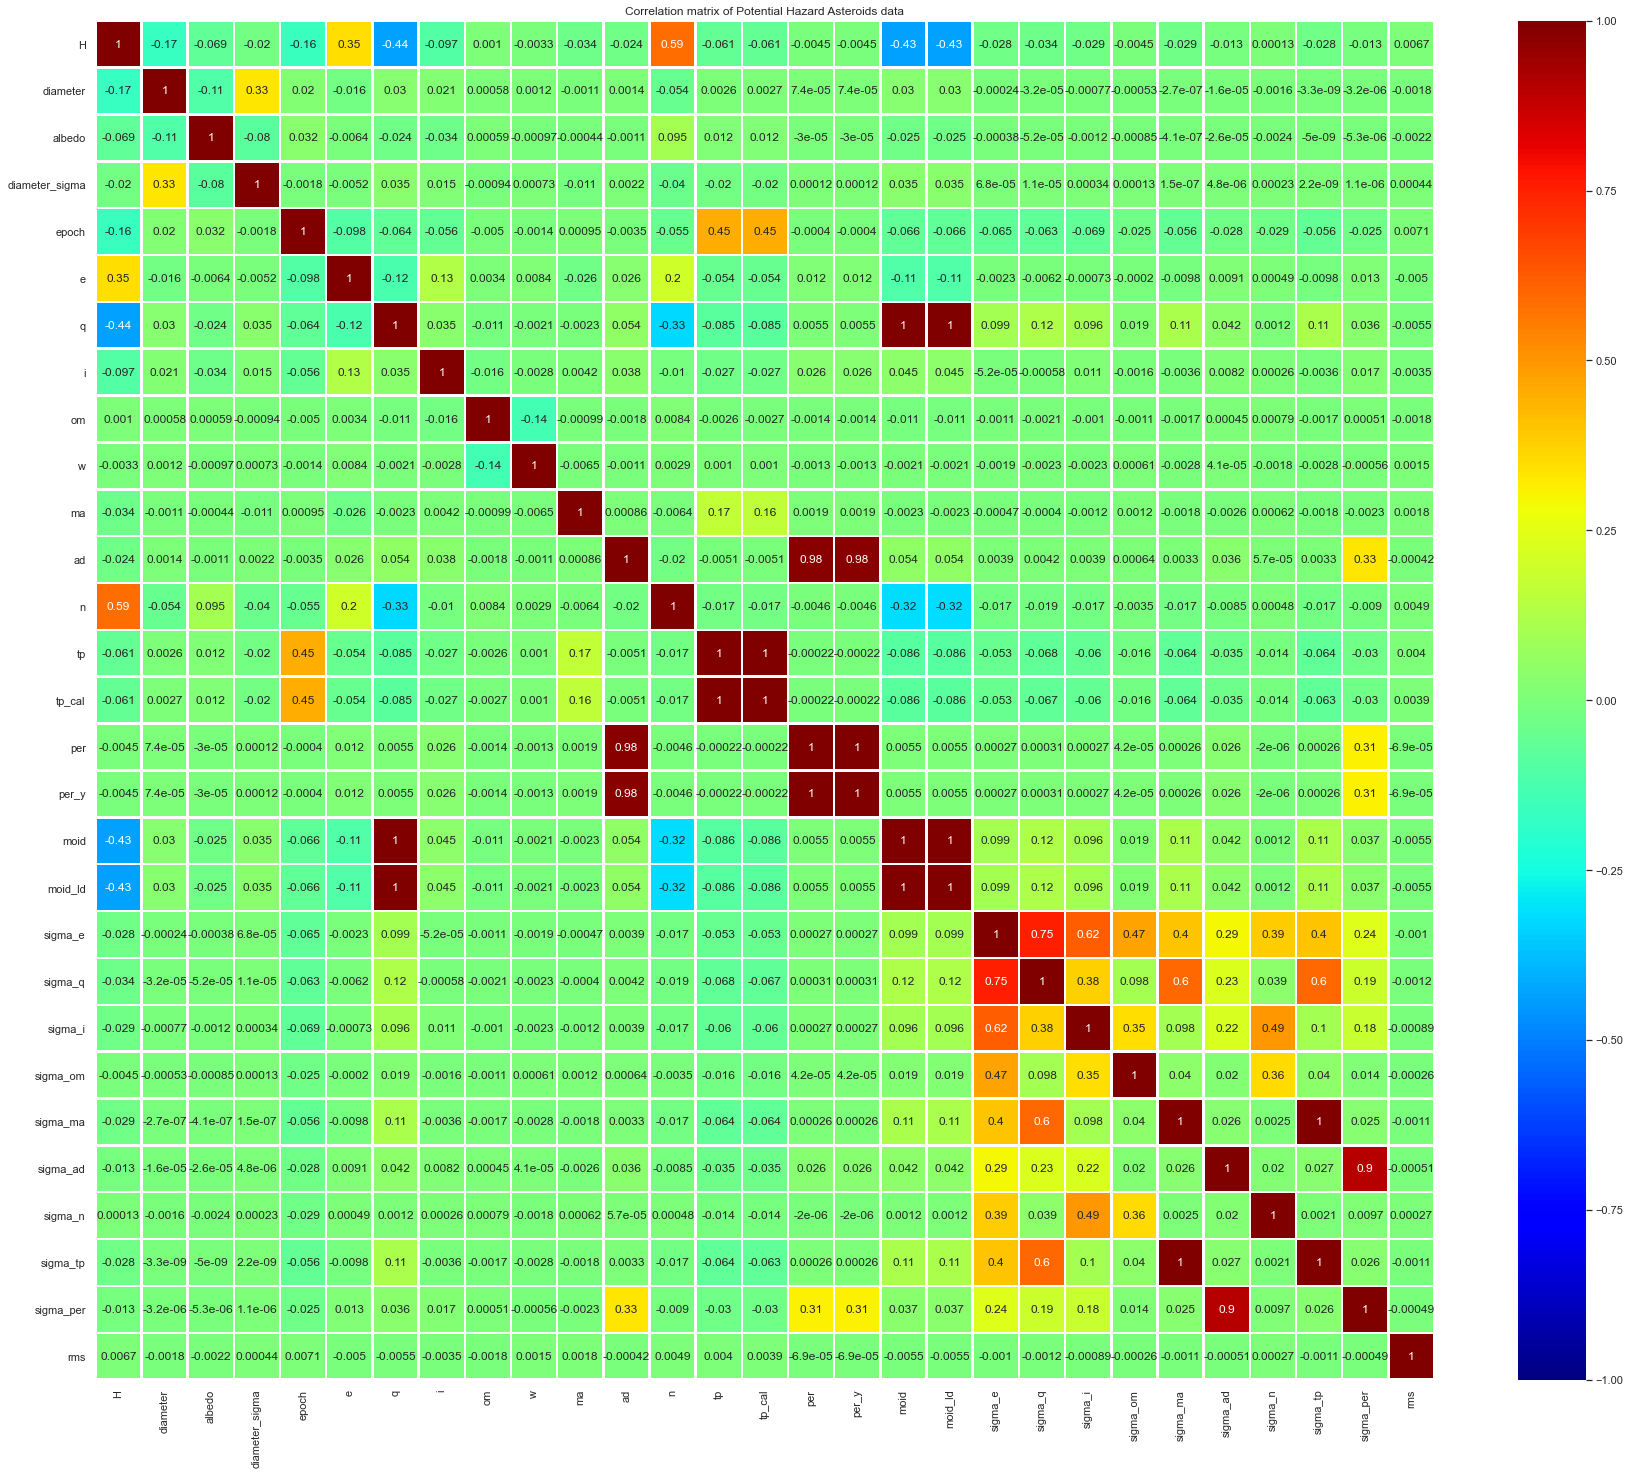

In [67]:
correlation_matrix=dataframe_subset.corr()
plt.figure(figsize=(30,25))
plt.title("Correlation matrix of Potential Hazard Asteroids data")
sns.heatmap(data=correlation_matrix,cmap='jet',vmin=-1,vmax=1,linewidth=1.5,annot=True)
fig1 = plt.gcf()
plt.show()
fig1.savefig("correlationmatrix1.png")

Performing minmax scaling so that it is easier for the models to predict.
Also performing concatenation of the non numeric columns back to get the entire dataset after scaling

In [35]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
dataframe_scaled = scaler.fit_transform(dataframe_subset)
dataframe_scaled = pd.DataFrame(dataframe_scaled, columns=dataframe_subset.columns)
dataframe_asteroid = pd.concat([dataframe_asteroid[['spkid', 'full_name','neo', 'pha', 'orbit_id', 'class']],dataframe_scaled],axis=1)
dataframe_scaled.head()
dataframe_asteroid.head()
dataframe_asteroid.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,e,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_q,sigma_i,sigma_om,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.385970e+05,938597.000000,938597.000000,938597.000000,938597.000000,938597.000000,938597.000000,938597.000000,938597.000000,938597.000000,938597.000000,938597.000000,938597.000000,938597.000000,938597.000000,938597.000000,9.385970e+05,9.385970e+05,938597.000000,938597.000000,9.385970e+05,9.385970e+05,9.385970e+05,9.385970e+05,9.385970e+05,9.385970e+05,9.385970e+05,9.385970e+05,9.385970e+05,938597.000000
mean,3.798488e+06,0.524493,0.005859,0.129757,0.003419,0.996198,0.156162,0.028970,0.051635,0.467916,0.503843,0.437287,0.000042,0.099421,0.667508,0.667398,2.236259e-06,2.236259e-06,0.017805,0.017805,1.841933e-05,1.953594e-05,2.111754e-05,4.428025e-06,1.280538e-05,3.867843e-06,6.572695e-06,1.222327e-05,4.461384e-06,0.000211
std,6.867774e+06,0.052339,0.003822,0.041898,0.002129,0.020780,0.092989,0.026873,0.037948,0.285763,0.288631,0.189455,0.001083,0.033582,0.006055,0.006074,1.042384e-03,1.042384e-03,0.027128,0.027128,2.368145e-03,2.860880e-03,2.317430e-03,1.111988e-03,2.187644e-03,1.306248e-03,1.274871e-03,2.099723e-03,1.448517e-03,0.001033
min,2.000001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.234651e+06,0.498542,0.005859,0.129757,0.003419,1.000000,0.092075,0.023667,0.023686,0.223794,0.254132,0.269790,0.000032,0.079559,0.666393,0.666631,5.346448e-07,5.346448e-07,0.012327,0.012327,1.388540e-12,1.440201e-13,1.100884e-10,3.013286e-11,7.704962e-16,4.246672e-15,3.594850e-13,1.066271e-17,9.386918e-16,0.000194
50%,2.469300e+06,0.524781,0.005859,0.129757,0.003419,1.000000,0.144884,0.026842,0.042249,0.444160,0.506571,0.433855,0.000036,0.096098,0.667844,0.668032,6.353104e-07,6.353104e-07,0.015613,0.015613,2.072573e-12,2.238132e-13,1.569527e-10,5.534427e-11,1.467169e-15,7.909485e-15,6.022761e-13,2.141547e-17,1.832186e-15,0.000211
75%,3.732213e+06,0.548105,0.005859,0.129757,0.003419,1.000000,0.200624,0.031237,0.070771,0.700505,0.754317,0.603111,0.000040,0.112162,0.669426,0.669438,7.814235e-07,7.814235e-07,0.020048,0.020048,5.926067e-12,6.485423e-13,2.875545e-10,1.341909e-10,5.147252e-15,2.171604e-14,1.459812e-12,7.814711e-17,5.115643e-15,0.000229
max,5.401723e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000


Applying get_dummies for the columns which had non numeric values

In [ ]:
dataframe_asteroid1 = pd.get_dummies(dataframe_asteroid, columns=['neo', 'class', 'orbit_id'])
dataframe_asteroid1.head()

Splitting into training and test data and also using stratify to equally split the Y and N value between training and testing

In [37]:
from sklearn.model_selection import train_test_split
X = dataframe_asteroid1.drop(['spkid', 'full_name', 'pha'], axis=1)
y = dataframe_asteroid1.iloc[:]['pha']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
print("Rows with label 'Y': {}".format(sum(y_train == 'Y')))
print("Rows with label 'N': {}".format(sum(y_train == 'N')))


Rows with label 'Y': 1446
Rows with label 'N': 655571


Checking to see if any of the values are null

In [38]:
X.isnull().sum()

H                  0
diameter           0
albedo             0
diameter_sigma     0
epoch              0
                  ..
orbit_id_JPL 95    0
orbit_id_JPL 96    0
orbit_id_JPL 97    0
orbit_id_JPL 98    0
orbit_id_JPL 99    0
Length: 568, dtype: int64

Checking the dataset to see if all the scaling, one hot encoding and missing values are handled properly

In [39]:
dataframe_asteroid1.head()

,spkid,full_name,pha,H,diameter,albedo,diameter_sigma,epoch,e,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_q,sigma_i,sigma_om,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms,neo_N,neo_Y,class_AMO,class_APO,class_AST,class_ATE,class_CEN,class_IEO,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO,orbit_id_1,orbit_id_10,orbit_id_100,orbit_id_101,...,orbit_id_JPL 57,orbit_id_JPL 58,orbit_id_JPL 581,orbit_id_JPL 59,orbit_id_JPL 6,orbit_id_JPL 60,orbit_id_JPL 609,orbit_id_JPL 61,orbit_id_JPL 62,orbit_id_JPL 63,orbit_id_JPL 64,orbit_id_JPL 65,orbit_id_JPL 66,orbit_id_JPL 67,orbit_id_JPL 68,orbit_id_JPL 69,orbit_id_JPL 7,orbit_id_JPL 70,orbit_id_JPL 704,orbit_id_JPL 71,orbit_id_JPL 72,orbit_id_JPL 73,orbit_id_JPL 74,orbit_id_JPL 75,orbit_id_JPL 76,orbit_id_JPL 77,orbit_id_JPL 78,orbit_id_JPL 79,orbit_id_JPL 8,orbit_id_JPL 80,orbit_id_JPL 81,orbit_id_JPL 82,orbit_id_JPL 83,orbit_id_JPL 84,orbit_id_JPL 85,orbit_id_JPL 86,orbit_id_JPL 87,orbit_id_JPL 88,orbit_id_JPL 89,orbit_id_JPL 9,orbit_id_JPL 90,orbit_id_JPL 91,orbit_id_JPL 92,orbit_id_JPL 93,orbit_id_JPL 94,orbit_id_JPL 95,orbit_id_JPL 96,orbit_id_JPL 97,orbit_id_JPL 98,orbit_id_JPL 99
0,2000001,1 Ceres,N,0.131195,1.000000,0.089089,0.001425,0.988218,0.076017,0.030975,0.060467,0.223071,0.204438,0.258627,0.000035,0.089827,0.665157,0.665258,6.843780e-07,6.843780e-07,0.020066,0.020066,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000161,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2000002,2 Pallas,N,0.154519,0.580156,0.100100,0.128568,1.000000,0.230004,0.025712,0.198916,0.480625,0.861674,0.379616,0.000041,0.089600,0.665470,0.665298,6.862835e-07,6.862835e-07,0.015530,0.015530,8.098714e-13,8.699747e-14,6.262048e-11,5.179478e-12,2.650639e-16,8.984495e-16,6.029037e-14,3.912546e-18,1.921434e-16,0.000134,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2000003,3 Juno,N,0.187464,0.262502,0.213213,0.075668,1.000000,0.256972,0.023805,0.074158,0.471810,0.689073,0.344645,0.000040,0.094969,0.665944,0.665354,6.436662e-07,6.436662e-07,0.013014,0.013014,7.740059e-13,8.016988e-14,5.816901e-11,1.383063e-11,2.426430e-16,7.900225e-16,5.717040e-14,3.384558e-18,1.621282e-16,0.000126,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2000004,4 Vesta,N,0.119534,0.559292,0.422222,0.001425,0.988218,0.088732,0.025911,0.040748,0.288363,0.418691,0.291718,0.000029,0.114070,0.665191,0.665269,5.245750e-07,5.245750e-07,0.014337,0.014337,5.793050e-15,1.880819e-15,3.839709e-12,2.721975e-13,3.590511e-17,2.972008e-16,3.377845e-14,3.903861e-19,6.623144e-17,0.000149,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2000005,5 Astraea,N,0.233236,0.113580,0.273273,0.022425,1.000000,0.190939,0.025049,0.030614,0.393253,0.996247,0.152094,0.000036,0.100232,0.667768,0.668020,6.063194e-07,6.063194e-07,0.013787,0.013787,6.019577e-13,6.000437e-14,4.945222e-11,2.409083e-11,2.484347e-16,8.562875e-16,7.157914e-14,3.332230e-18,1.821889e-16,0.000194,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Creating a function to calculate the metrics easily for precision,recall,accuracy and f1

In [40]:
def CalculationOfMetric(y_test, pred):
    
    precision_metric = metrics.precision_score(y_test, pred, average = "macro")
    recall_metric = metrics.recall_score(y_test, pred, average = "macro")
    accuracy_metric = metrics.accuracy_score(y_test, pred)
    f1_metric = metrics.f1_score(y_test, pred, average = "macro")
    
    print('Precision metric:',round(precision_metric, 4))
    print('Recall Metric:',round(recall_metric, 4))
    print('Accuracy Metric:',round(accuracy_metric, 4))
    print('F1 score:',round(f1_metric, 4))

Trying SMOTE since we have a minority of potentially hazardous asteroids in order to get equal number of Y and N cases

In [41]:
#Synthetic Minority Oversampling Technique
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 12) 
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel()) 
  
print("After SMOTE, counts of label 'N': {}".format(sum(y_train_res == 'N'))) 
print("After SMOTE, counts of label 'Y': {}".format(sum(y_train_res == 'Y'))) 

After SMOTE, counts of label 'N': 655571
After SMOTE, counts of label 'Y': 655571


Logistic regression model without using SMOTE, it has a lot of false negatives

In [42]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logisticRegr = LogisticRegression(max_iter= 10000) # create object for the class

# Fit to train model with features and labels
logisticRegr.fit(x_train, y_train)

# Predict for test set
lr_pred = logisticRegr.predict(x_test)

In [43]:
CalculationOfMetric(y_test, lr_pred)

Precision metric: 0.7278
Recall Metric: 0.582
Accuracy Metric: 0.9977
F1 score: 0.6204


In [44]:
print(metrics.confusion_matrix(y_test, lr_pred))

[[280839    121]
 [   518    102]]


Using SMOTE dataset to check if the false negatives are eliminated

In [45]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logisticRegr = LogisticRegression(max_iter= 10000) # create object for the class

# Fit to train model with features and labels using SMOTE
logisticRegr.fit(x_train_res, y_train_res)

# Predict for test set
slr_pred = logisticRegr.predict(x_test)

In [46]:
CalculationOfMetric(y_test, slr_pred)

Precision metric: 0.5972
Recall Metric: 0.9858
Accuracy Metric: 0.991
F1 score: 0.66


In [47]:
print(metrics.confusion_matrix(y_test, slr_pred))

[[278440   2520]
 [    12    608]]


Random Forest Model

In [48]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 150 decision trees
rf = RandomForestClassifier(n_estimators = 150, random_state = 1551)
# Train the model on training data
rf.fit(x_train, y_train)
# Predict for test set
rf_pred = rf.predict(x_test)

In [49]:
CalculationOfMetric(y_test, rf_pred)

Precision metric: 0.9949
Recall Metric: 0.9718
Accuracy Metric: 0.9999
F1 score: 0.983


In [50]:
print(metrics.confusion_matrix(y_test, rf_pred))

[[280954      6]
 [    35    585]]


Decision Tree Model

In [51]:
from sklearn.tree import DecisionTreeClassifier
FEATURE_NAMES=X.columns
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
model_pred=model.predict(x_test)

In [52]:
CalculationOfMetric(y_test, model_pred)

Precision metric: 0.9894
Recall Metric: 0.9863
Accuracy Metric: 0.9999
F1 score: 0.9878


In [53]:
print(metrics.confusion_matrix(y_test, model_pred))

[[280947     13]
 [    17    603]]


printing the Decision trees

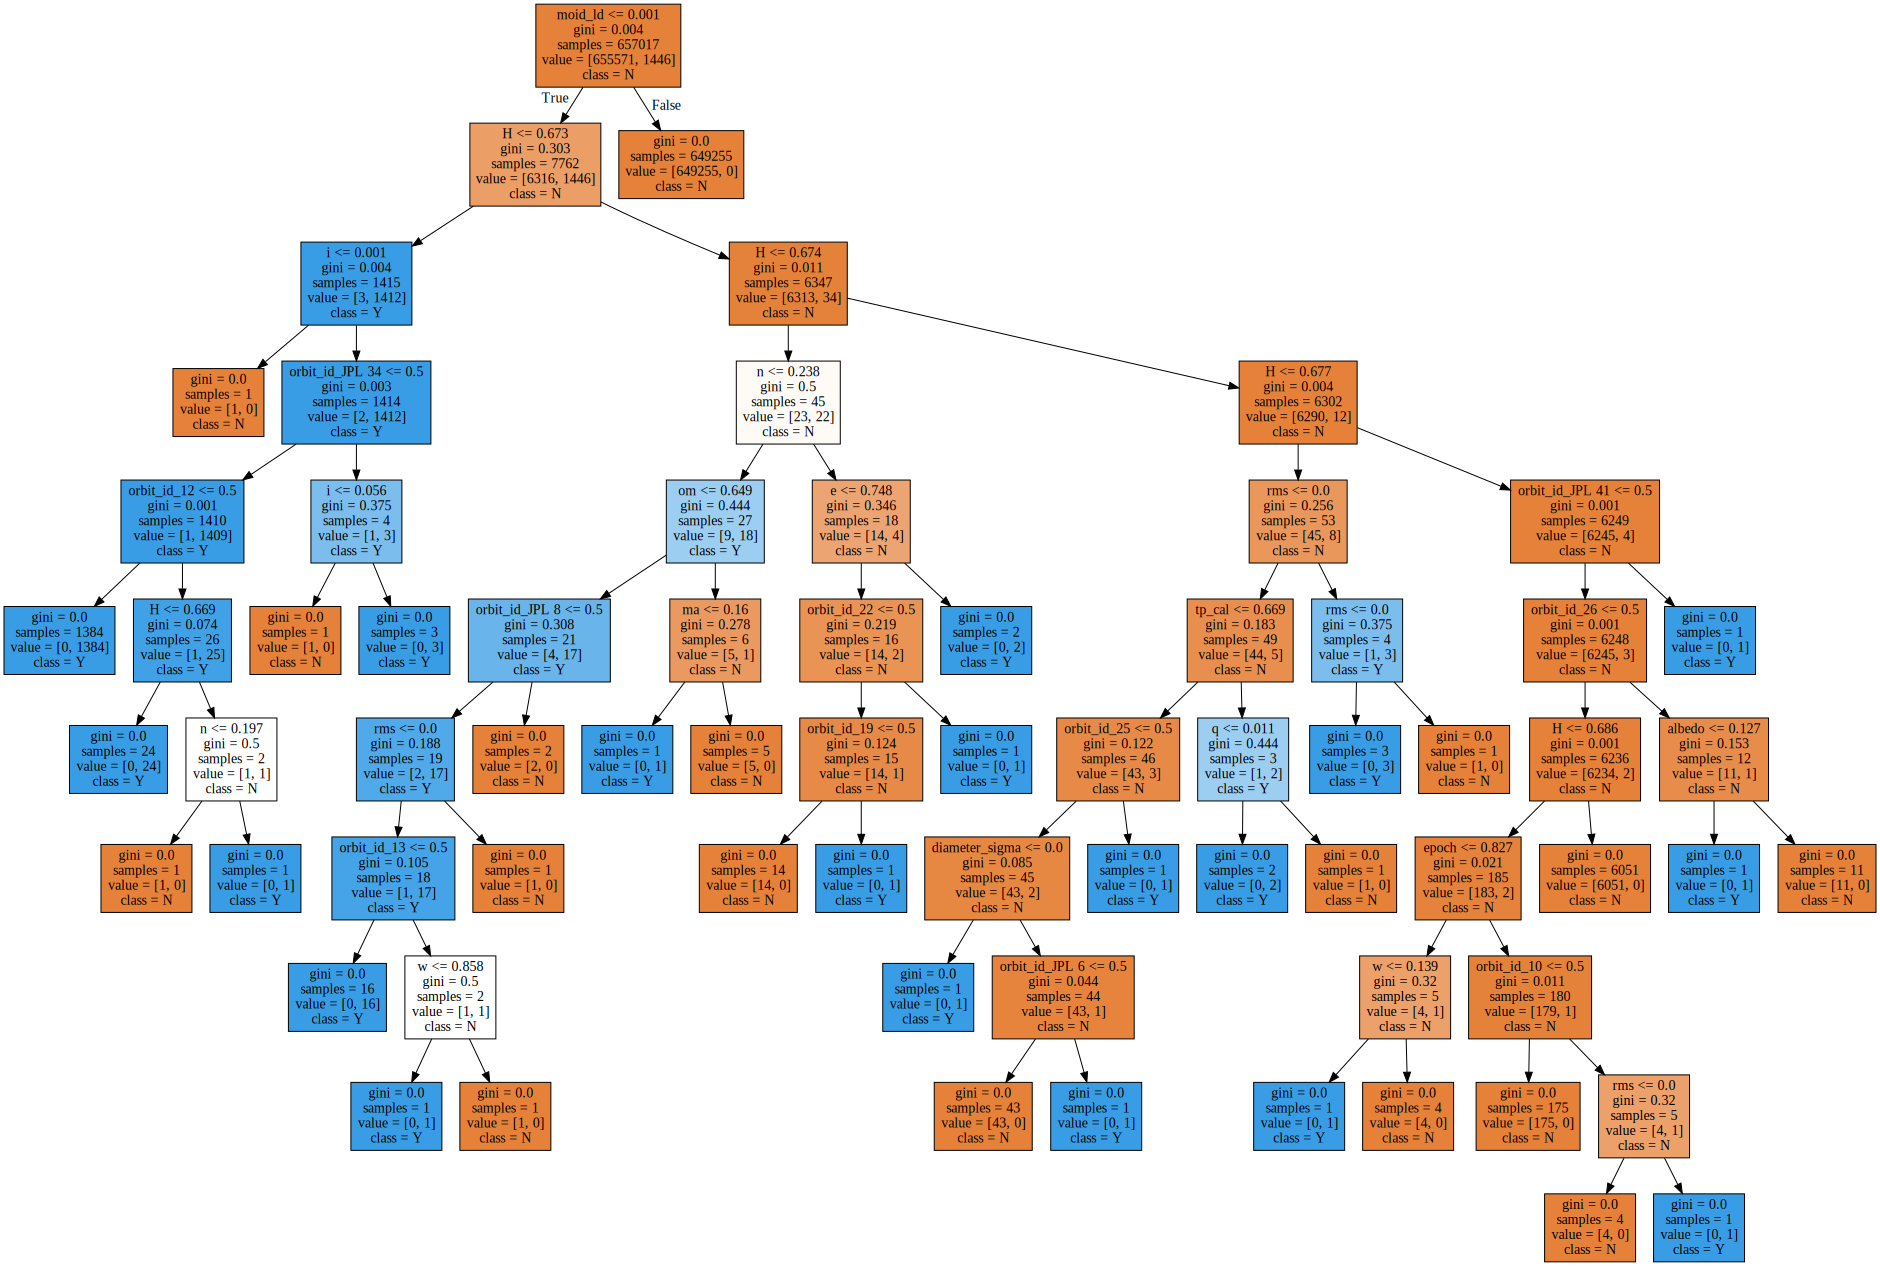

In [54]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=FEATURE_NAMES, 
                                class_names=['N','Y'],
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph


Saving the decision tree as a png file

In [55]:
from sklearn.tree import export_graphviz
from six import StringIO  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = FEATURE_NAMES,class_names=['N','Y'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('my_decision_tree.png')

True

GaussianNB model performing hyper parameter tuning as the model was giving a lesser accuracy score than other models

In [56]:
from sklearn.naive_bayes import GaussianNB 
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=20)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB,
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x_train, y_train)
gs_NB.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 17.0min finished


{'var_smoothing': 5.455594781168526e-05}

In [57]:
gs_NBbest = gs_NB.predict(x_test)
CalculationOfMetric(y_test, gs_NBbest)

Precision metric: 0.6276
Recall Metric: 0.7516
Accuracy Metric: 0.9957
F1 score: 0.6691


In [58]:
print(metrics.confusion_matrix(y_test, gs_NBbest))

[[280049    911]
 [   306    314]]


In [59]:
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB()
gnb.fit(x_train, y_train)

# Predict for test set
gnb_pred = gnb.predict(x_test)

In [60]:
CalculationOfMetric(y_test, gnb_pred)

Precision metric: 0.5455
Recall Metric: 0.9638
Accuracy Metric: 0.9791
F1 score: 0.5778


In [61]:
print(metrics.confusion_matrix(y_test, gnb_pred))

[[275093   5867]
 [    32    588]]


Printing the important features in order for random forest

In [62]:
feature_imp = pd.DataFrame(rf.feature_importances_,index=x_train.columns, columns = ['Importance']).sort_values(by='Importance', ascending=False)

In [63]:
feature_imp[0:10]

,Importance
H,0.270470
moid_ld,0.141679
moid,0.121768
q,0.048021
e,0.036879
i,0.035962
n,0.025443
tp,0.022388
class_APO,0.021555
ad,0.019261


Printing the Metrics for all the models

In [64]:
print("logistic regression metrics")
CalculationOfMetric(y_test, lr_pred)
print("*******************************************")
print("logistic regression metrics with SMOTE")
CalculationOfMetric(y_test, slr_pred)
print("*******************************************")
print("Random forest metrics")
CalculationOfMetric(y_test, rf_pred)
print("*******************************************")
print("Gaussian naive bayes after hyper parameter turning metrics")
CalculationOfMetric(y_test, gs_NBbest)
print("*******************************************")
print("Gaussian naive bayes metrics")
CalculationOfMetric(y_test, gnb_pred)
print("*******************************************")
print("Decision Tree metrics")
CalculationOfMetric(y_test, model_pred)

logistic regression metrics
Precision metric: 0.7278
Recall Metric: 0.582
Accuracy Metric: 0.9977
F1 score: 0.6204
*******************************************
logistic regression metrics with SMOTE
Precision metric: 0.5972
Recall Metric: 0.9858
Accuracy Metric: 0.991
F1 score: 0.66
*******************************************
Random forest metrics
Precision metric: 0.9949
Recall Metric: 0.9718
Accuracy Metric: 0.9999
F1 score: 0.983
*******************************************
Gaussian naive bayes after hyper parameter turning metrics
Precision metric: 0.6276
Recall Metric: 0.7516
Accuracy Metric: 0.9957
F1 score: 0.6691
*******************************************
Gaussian naive bayes metrics
Precision metric: 0.5455
Recall Metric: 0.9638
Accuracy Metric: 0.9791
F1 score: 0.5778
*******************************************
Decision Tree metrics
Precision metric: 0.9894
Recall Metric: 0.9863
Accuracy Metric: 0.9999
F1 score: 0.9878


Plotting a bar graph to see the accuracy scores for all the models

maximum accuracy is 0.9998934583422118


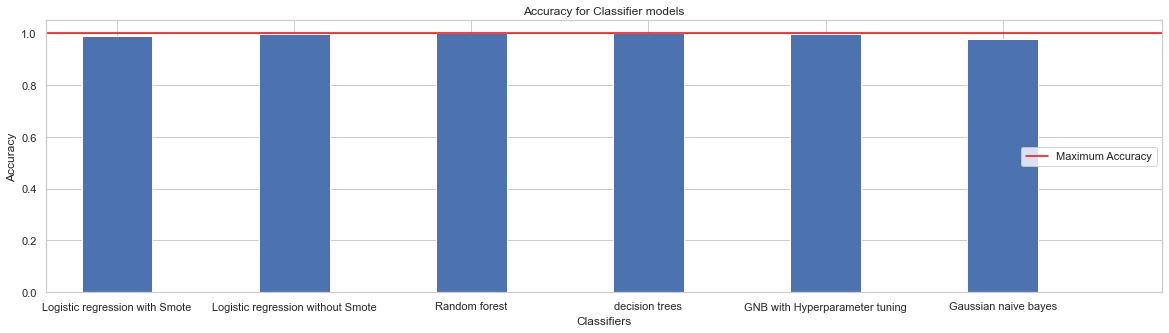

In [65]:
accuracy_scores= {'Logistic regression with Smote': metrics.accuracy_score(y_test, slr_pred),'Logistic regression without Smote': metrics.accuracy_score(y_test, lr_pred), 'Random forest': metrics.accuracy_score(y_test, rf_pred), 'decision trees': metrics.accuracy_score(y_test, model_pred),'GNB with Hyperparameter tuning': metrics.accuracy_score(y_test,gs_NBbest ), 'Gaussian naive bayes': metrics.accuracy_score(y_test, gnb_pred) }
classifiers = accuracy_scores.keys()
accuracy = accuracy_scores.values()
plt.figure(figsize = (20, 5))
plt.bar(classifiers, accuracy, 0.4)
plt.plot(range(-1,7), np.ones(8)*max(accuracy), color = 'red', label = 'Maximum Accuracy')
plt.xlim(-0.4,5.9)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.legend(loc = 'right')
plt.title('Accuracy for Classifier models')
print("maximum accuracy is",max(accuracy))

Plotting a bar graph to see the F1 scores for all the models

maximum F1 score is 0.9878373836685788


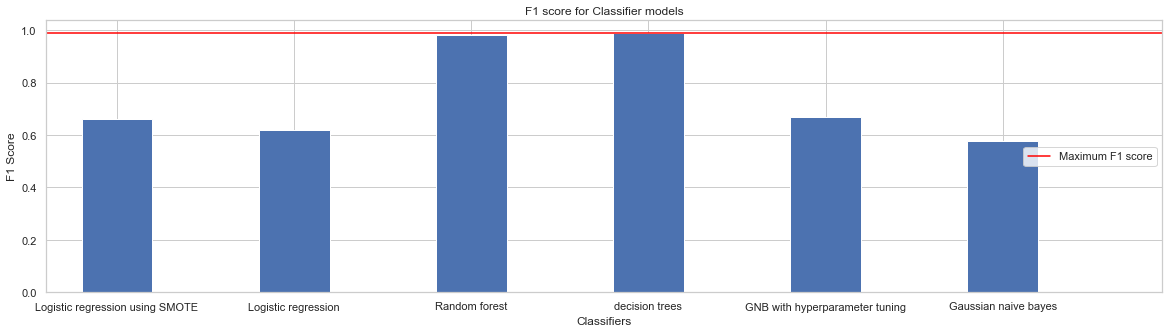

In [66]:
F1_scores= {'Logistic regression using SMOTE': metrics.f1_score(y_test, slr_pred, average = "macro"),'Logistic regression': metrics.f1_score(y_test, lr_pred, average = "macro"), 'Random forest':  metrics.f1_score(y_test, rf_pred, average = "macro"), 'decision trees':  metrics.f1_score(y_test, model_pred, average = "macro"),'GNB with hyperparameter tuning': metrics.f1_score(y_test, gs_NBbest, average = "macro"), 'Gaussian naive bayes':  metrics.f1_score(y_test, gnb_pred, average = "macro") }
classifiers = F1_scores.keys()
f1 = F1_scores.values() 
plt.figure(figsize = (20, 5))
plt.bar(classifiers, f1, 0.4)
plt.plot(range(-1,7), np.ones(8)*max(f1), color = 'red', label = 'Maximum F1 score')
plt.xlim(-0.4,5.9)
plt.xlabel('Classifiers')
plt.ylabel('F1 Score')
plt.legend(loc = 'right')
plt.title('F1 score for Classifier models')
print("maximum F1 score is",max(f1))